# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [2]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

In [4]:
# code here
import matplotlib.pyplot as plt


L1 = Ridge(alpha=0.1)
L2 = Lasso(alpha=0.1)

L1.fit(X_train, y_train)
L2.fit(X_train, y_train)

pred1 = L1.predict(X_test)
pred2 = L2.predict(X_test)



Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [6]:
# code here
print("RMSE" ,np.sqrt(metrics.mean_squared_error(y_train, L1.predict(X_train))))
print("MAE", metrics.mean_absolute_error(y_train, L1.predict(X_train)))
print("R^2", metrics.r2_score(y_train, L1.predict(X_train)))

RMSE 53.750114794227926
MAE 42.62236538409616
R^2 0.5337459946558969


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

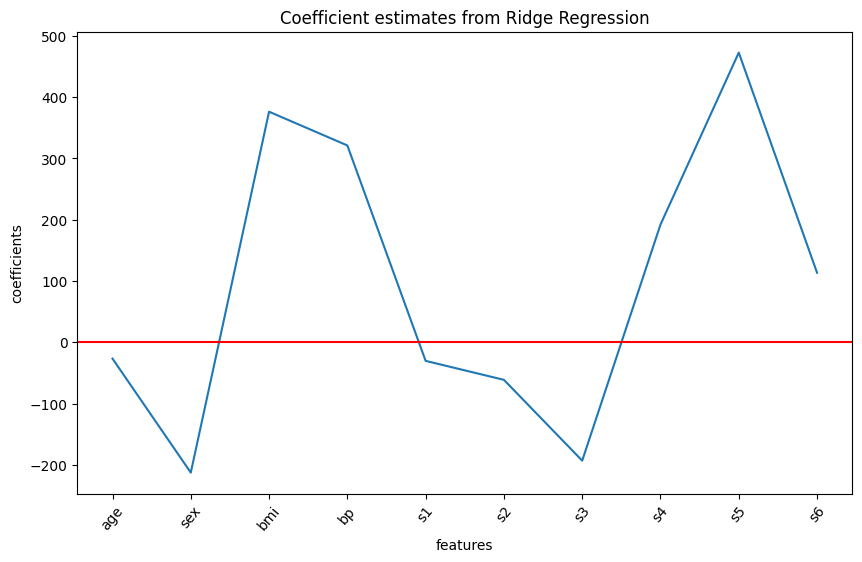

In [7]:
# code here
import matplotlib.pylab as plt

best_ridge_coeffs = L1.fit(X_train, y_train).coef_

feature_names = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Построение графика c коэффициентами для всех десяти признаков
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

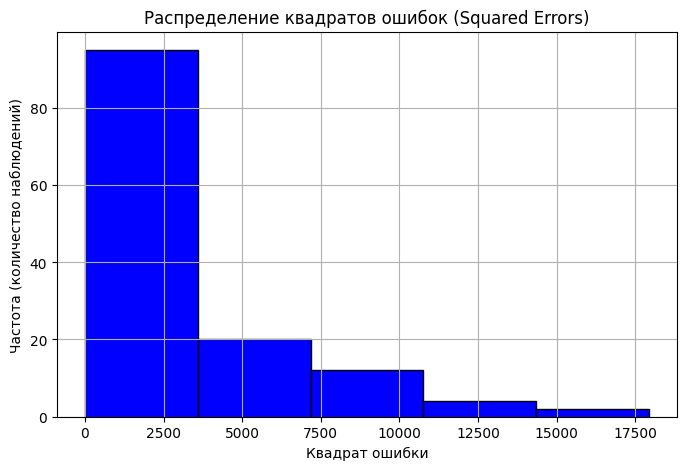

In [8]:
# code here
L1.fit(X_train, y_train)
y_pred = L1.predict(X_test)

squared_errors = (y_test - y_pred) ** 2

plt.figure(figsize=(8, 5))
plt.hist(squared_errors, bins=5, color='blue', edgecolor='black')
plt.title('Распределение квадратов ошибок (Squared Errors)')
plt.xlabel('Квадрат ошибки')
plt.ylabel('Частота (количество наблюдений)')
plt.grid(True)
plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

__Задание 3.__ Отчёт

**(2 балла)**

In [ ]:
# code here